# ECON 4305 Project
# Data Cleaning

In [1]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from pandas import read_csv
import time
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [2]:
# Imports data
macro = pd.read_excel('US FRED-MD Macro Dataset.xlsx', sheet_name=1,header=0, index_col=0)
macro.shape

(773, 127)

In [3]:
macro.head

<bound method NDFrame.head of                   RPI  W875RX1  DPCERA3M086SBEA     CMRMTSPLx       RETAILx  \
sasdate                                                                       
1959-01-01   2442.158   2293.2           17.272  2.922664e+05   18235.77392   
1959-02-01   2451.778   2301.5           17.452  2.944247e+05   18369.56308   
1959-03-01   2467.594   2318.5           17.617  2.934187e+05   18523.05762   
1959-04-01   2483.671   2334.9           17.553  2.993228e+05   18534.46600   
1959-05-01   2498.026   2350.4           17.765  3.013643e+05   18679.66354   
...               ...      ...              ...           ...           ...   
2023-01-01  17821.000  14623.3          130.028  1.581882e+06  692501.00000   
2023-02-01  17839.528  14622.7          129.991  1.575290e+06  687942.00000   
2023-03-01  17885.887  14664.3          129.948  1.560472e+06  681673.00000   
2023-04-01  17866.773  14659.0          130.255  1.556928e+06  684213.00000   
2023-05-01  17915.688 

In [4]:
# Imports data
tran_code = pd.read_excel('US FRED-MD Macro Dataset.xlsx', sheet_name=0, header=0, index_col=1, usecols=[1,2]).T
tran_code.shape

(1, 127)

In [5]:
tran_code

fred   RPI  W875RX1  DPCERA3M086SBEA  CMRMTSPLx  RETAILx  INDPRO  IPFPNSS  \
tcode    5        5                5          5        5       5        5   

fred   IPFINAL  IPCONGD  IPDCONGD  ...  DNDGRG3M086SBEA  DSERRG3M086SBEA  \
tcode        5        5         5  ...                6                6   

fred   CES0600000008  CES2000000008  CES3000000008  UMCSENTx  DTCOLNVHFNM  \
tcode              6              6              6         2            6   

fred   DTCTHFNM  INVEST  VIXCLSx  
tcode         6       6        1  

[1 rows x 127 columns]

In [6]:
def data_transform(x, tran_code):
    
    if tran_code == 1:
        x_tr = x        
        
    elif tran_code == 2:
        x_tr = x.diff()
            
    elif tran_code == 3:
        x_tr = x.diff().diff()
        
    elif tran_code == 4:
        x_tr = np.log(x)
        
    elif tran_code == 5:
        x_tr = np.log(x).diff()*100
    
    elif tran_code == 6:
        x_tr = np.log(x).diff().diff()*100
    
    elif tran_code == 7:
        x_tr = (x.pct_change()-1)*100
    return x_tr    

In [7]:
macro["NONBORRES"].shift(1)

sasdate
1959-01-01          NaN
1959-02-01      18300.0
1959-03-01      18100.0
1959-04-01      17800.0
1959-05-01      18000.0
                ...    
2023-01-01    3090000.0
2023-02-01    3014200.0
2023-03-01    3006200.0
2023-04-01    3043100.0
2023-05-01    2939800.0
Name: NONBORRES, Length: 773, dtype: float64

In [8]:
macro_tr=[]

for col in macro.columns:
    tr_code = tran_code[col].values
    data_tr = data_transform(macro[col], tr_code)
    macro_tr.append(data_tr)

macro_tr = pd.DataFrame(macro_tr).T

In [9]:
macro_tr["NONBORRES"]

sasdate
1959-01-01           NaN
1959-02-01   -101.092896
1959-03-01   -101.657459
1959-04-01    -98.876404
1959-05-01   -101.111111
                 ...    
2023-01-01   -102.453074
2023-02-01   -100.265410
2023-03-01    -98.772537
2023-04-01   -103.394565
2023-05-01   -100.387781
Name: NONBORRES, Length: 773, dtype: float64

In [10]:
# Imports data
Inflation = np.log(macro["CPIAUCSL"]).diff()*100

In [11]:
Inflation

sasdate
1959-01-01         NaN
1959-02-01   -0.034477
1959-03-01   -0.103502
1959-04-01    0.034513
1959-05-01    0.206825
                ...   
2023-01-01    0.515742
2023-02-01    0.369323
2023-03-01    0.053028
2023-04-01    0.367109
2023-05-01    0.124049
Name: CPIAUCSL, Length: 773, dtype: float64

In [12]:
macro_final = pd.concat([macro_tr, Inflation], axis=1)
macro_final.columns=[*macro_tr.columns,"Inflation"]
macro_final=macro_final.drop(["1959-01-01"]).fillna(method="ffill").dropna()

In [13]:
# Show rows and columns
print("Rows, Columns:");print(macro_final.shape);print("\n")

# Describe DataFrame columns
print("Columns:");print(macro_final.columns);print("\n")

# Show info on DataFrame
print("Info:");print(macro_final.info(max_cols=1000)); print("\n")

# Count Non-NA values
print("Non-NA:");print(macro_final.count()); print("\n")

# Show head
print("Head");print(macro_final.head()); print("\n")

# Show tail
print("Tail");print(macro_final.tail());print("\n")

# Show summary statistics
print("Summary statistics:");print(macro_final.describe());print("\n")

Rows, Columns:
(375, 128)


Columns:
Index(['RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx', 'RETAILx', 'INDPRO',
       'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD',
       ...
       'CES0600000008', 'CES2000000008', 'CES3000000008', 'UMCSENTx',
       'DTCOLNVHFNM', 'DTCTHFNM', 'INVEST', 'VIXCLSx', 'CPIAUCSL',
       'Inflation'],
      dtype='object', length=128)


Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 375 entries, 1992-03-01 to 2023-05-01
Data columns (total 128 columns):
 #    Column           Non-Null Count  Dtype  
---   ------           --------------  -----  
 0    RPI              375 non-null    float64
 1    W875RX1          375 non-null    float64
 2    DPCERA3M086SBEA  375 non-null    float64
 3    CMRMTSPLx        375 non-null    float64
 4    RETAILx          375 non-null    float64
 5    INDPRO           375 non-null    float64
 6    IPFPNSS          375 non-null    float64
 7    IPFINAL          375 non-null    float64
 8    IPCONGD          375 

              RPI     W875RX1  DPCERA3M086SBEA   CMRMTSPLx     RETAILx  \
count  375.000000  375.000000       375.000000  375.000000  375.000000   
mean     0.215520    0.202026         0.225666    0.190850    0.381480   
std      1.644681    0.784642         1.010070    1.214898    1.756461   
min    -14.565065   -6.056840       -12.799379  -12.889057  -15.809242   
25%      0.007161   -0.029388         0.023042   -0.263943   -0.100340   
50%      0.217967    0.244318         0.221694    0.211416    0.391249   
75%      0.421696    0.466747         0.448083    0.735339    0.913302   
max     18.234919    4.012112         8.208242    7.732231   17.405309   

           INDPRO     IPFPNSS     IPFINAL     IPCONGD    IPDCONGD  ...  \
count  375.000000  375.000000  375.000000  375.000000  375.000000  ...   
mean     0.135688    0.097974    0.105765    0.067255    0.168305  ...   
std      1.090312    1.113078    1.233082    1.147343    4.052974  ...   
min    -14.365634  -14.656939  -15.70

In [14]:
#Define Data for Machine Learning

X_start = 1  
X_lag = 1

# Features and Target
X, y = macro_final.iloc[X_start:-X_lag,:-1], macro_final.iloc[X_start+X_lag:,127]


In [15]:
X

RPI   W875RX1  DPCERA3M086SBEA  CMRMTSPLx   RETAILx  \
sasdate                                                                
1992-04-01  0.373032  0.275060         0.083938   0.664201  0.601652   
1992-05-01  0.532885  0.549297         0.514589  -0.873850  0.546742   
1992-06-01  0.417254  0.444719         0.269590   1.048664  0.280383   
1992-07-01 -0.079646 -0.134642         0.334203   1.330298  0.708002   
1992-08-01  0.386454  0.380539         0.246840  -1.603560  0.324124   
...              ...       ...              ...        ...       ...   
2022-12-01 -0.013781 -0.019171        -0.193846   1.490076 -0.719328   
2023-01-01  0.087570  0.130699         1.316033   0.190398  2.764501   
2023-02-01  0.103913 -0.004103        -0.028459  -0.417590 -0.660515   
2023-03-01  0.259530  0.284085        -0.033085  -0.945104 -0.915446   
2023-04-01 -0.106924 -0.036149         0.235970  -0.227369  0.371920   

              INDPRO   IPFPNSS   IPFINAL   IPCONGD  IPDCONGD  ...  \
sasdate                                                       ...   
1992-04-01  0.769184  0.748975  0.760298  0.940532  1.843950  ...   
1992-05-01  0.324748  0.546363  0.580914  0.647050  3.074505  ...   
1992-06-01  0.059695 -0.239920 -0.304895 -0.484071 -1.398611  ...   
1992-07-01  0.893837  0.995847  1.126762  1.294361  2.614598  ...   
1992-08-01 -0.549192 -0.106279 -0.111965  0.036867 -0.863906  ...   
...              ...       ...       ...       ...       ...  ...   
2022-12-01 -1.550613 -1.202485 -0.846966 -0.623823 -1.031771  ...   
2023-01-01  1.003181  0.343776 -0.014901 -0.334291  0.217564  ...   
2023-02-01 -0.005561 -0.196666 -0.129562  0.097723  0.212525  ...   
2023-03-01  0.146036 -0.076300 -0.030143  0.276299 -1.061013  ...   
2023-04-01  0.507904  0.717250  0.973228  0.963931  4.140587  ...   

            DSERRG3M086SBEA  CES0600000008  CES2000000008  CES3000000008  \
sasdate                                                                    
1992-04-01         0.077728       0.083014      -0.583570       0.175899   
1992-05-01        -0.255295      -0.251432      -0.072648      -0.088998   
1992-06-01         0.023712       0.250035       0.795664      -0.088298   
1992-07-01         0.264845      -0.416910      -1.518733      -0.000307   
1992-08-01        -0.285966       0.499100       1.157537       0.086992   
...                     ...            ...            ...            ...   
2022-12-01         0.175427      -0.107940       0.300155      -0.590025   
2023-01-01         0.033243       0.170724      -0.004386       0.309575   
2023-02-01        -0.224790      -0.417543      -0.152983      -0.621376   
2023-03-01        -0.081575       0.240091       0.027041       0.579697   
2023-04-01         0.107827      -0.139110      -0.150135      -0.233149   

            UMCSENTx  DTCOLNVHFNM  DTCTHFNM    INVEST  VIXCLSx  CPIAUCSL  
sasdate                                                                   
1992-04-01       1.2     3.714687 -0.584329  0.134978  16.1885 -0.144661  
1992-05-01       2.0    -5.294144  0.020679  0.410802  14.7280 -0.000463  
1992-06-01       1.2     4.562073  0.881246 -0.087417  14.7531  0.070942  
1992-07-01      -3.8    -0.352309 -0.854378  0.216749  13.3036 -0.000815  
1992-08-01      -0.5    -0.633643  1.163376  0.042164  14.4223 -0.071808  
...              ...          ...       ...       ...      ...       ...  
2022-12-01       2.9    -0.283245 -0.123254  0.880929  21.7702 -0.073638  
2023-01-01       5.2     0.071035  0.049043 -0.142513  20.2269  0.384548  
2023-02-01       2.1    -0.237727 -0.068985 -0.121427  20.2141 -0.146419  
2023-03-01      -5.0     0.505030  0.343295 -2.045412  22.0446 -0.316295  
2023-04-01       1.5    -0.654981 -0.037264  0.128939  17.4930  0.314081  

[373 rows x 127 columns]

In [16]:
y

sasdate
1992-05-01    0.214977
1992-06-01    0.285919
1992-07-01    0.285104
1992-08-01    0.213295
1992-09-01    0.212842
                ...   
2023-01-01    0.515742
2023-02-01    0.369323
2023-03-01    0.053028
2023-04-01    0.367109
2023-05-01    0.124049
Name: Inflation, Length: 373, dtype: float64

In [17]:
import os  
os.makedirs('Data preprocess', exist_ok=True)  
X.to_csv('Data preprocess/x.csv') 

y.to_csv('Data preprocess/y.csv')

In [18]:
steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
           ('pca', PCA(n_components = 1, random_state=1))]

pl_pca_X = Pipeline(steps_X)

X_pca_model = pl_pca_X.fit(X)

print('n_components:', 1, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())

X_pca = X_pca_model.transform(X)

n_components: 1    variance explained: 0.223


In [19]:
for n_comp in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,125]:

    steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = n_comp, random_state=1))]
    
    pl_pca_X = Pipeline(steps_X)
    X_pca_model = pl_pca_X.fit(X)
    
    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())


n_components: 1    variance explained: 0.223
n_components: 2    variance explained: 0.313
n_components: 3    variance explained: 0.390
n_components: 4    variance explained: 0.450
n_components: 5    variance explained: 0.491
n_components: 6    variance explained: 0.527
n_components: 7    variance explained: 0.555
n_components: 8    variance explained: 0.580
n_components: 9    variance explained: 0.602
n_components: 10    variance explained: 0.623
n_components: 11    variance explained: 0.643
n_components: 12    variance explained: 0.661
n_components: 13    variance explained: 0.678
n_components: 14    variance explained: 0.695
n_components: 15    variance explained: 0.710
n_components: 16    variance explained: 0.723
n_components: 17    variance explained: 0.737
n_components: 18    variance explained: 0.749
n_components: 19    variance explained: 0.761
n_components: 20    variance explained: 0.773
n_components: 30    variance explained: 0.859
n_components: 50    variance explained: 0.9

In [20]:
# pipeline
def pipeline(config):

    # unpack config
    n_comps = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components = n_comps, random_state=1)),
             ('ols', LinearRegression())
            ]

    pipeline = Pipeline(steps)

    return pipeline

In [21]:
def walk_forward_validation(cfg):
    
    n_train = 261

    n_records = len(X)

    y_test_list = []
    
    y_pred_list = []

    j = 0

    for i in range(n_train, n_records):    #rolling window 
    
        X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
       
        model = pipeline(cfg).fit(X_train, y_train)        
    
        y_pred = model.predict(X_test)   #Predicted GDP Growth
    
        y_pred_list.extend(y_pred)
    
        y_test_list.extend(y_test)

        j += 1
    
    score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
    
    print(' > %.3f' % score_rmse)
    
    return score_rmse 

In [22]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [23]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_rmse, asc
    #scores.sort(key=lambda tup: tup[1])
    scores.sort(key=lambda tup: tup[1], reverse=True)
    return scores

In [24]:
# create a list of configs to try
def model_configs():
    # define scope of configs
      
    n_comps = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30,50,100]   #no. of PCA, set the upper limit to 30

     
    # create configs
    configs = list()
    
    for k in n_comps:
        cfg = k
        configs.append(cfg)

    print('Total configs: %d' % len(configs))
    return configs

In [25]:
# model configs
cfg_list = model_configs()

Total configs: 20


In [26]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 20
 > 0.374
> Model[1] 0.374
 > 0.359
> Model[2] 0.359
 > 0.336
> Model[3] 0.336
 > 0.312
> Model[4] 0.312
 > 0.306
> Model[5] 0.306
 > 0.311
> Model[6] 0.311
 > 0.316
> Model[7] 0.316
 > 0.322
> Model[8] 0.322
 > 0.302
> Model[9] 0.302
 > 0.298
> Model[10] 0.298
 > 0.278
> Model[11] 0.278
 > 0.274
> Model[12] 0.274
 > 0.274
> Model[13] 0.274
 > 0.265
> Model[14] 0.265
 > 0.268
> Model[15] 0.268
 > 0.261
> Model[20] 0.261
 > 0.265
> Model[25] 0.265
 > 0.282
> Model[30] 0.282
 > 0.336
> Model[50] 0.336
 > 0.605
> Model[100] 0.605
done


In [27]:
scores

[('100', 0.6052688302515076),
 ('1', 0.3739686528939461),
 ('2', 0.35854068535195377),
 ('3', 0.3360373131198578),
 ('50', 0.3359637609139024),
 ('8', 0.32164665350267435),
 ('7', 0.3163702124366137),
 ('4', 0.31160057481765396),
 ('6', 0.31092079018374147),
 ('5', 0.30628849641343736),
 ('9', 0.3016026482626887),
 ('10', 0.29759633347946973),
 ('30', 0.28162586065680956),
 ('11', 0.2776544380932168),
 ('12', 0.27383351989830323),
 ('13', 0.27364598026953885),
 ('15', 0.2675844648275973),
 ('25', 0.2654432620168182),
 ('14', 0.26499413014334866),
 ('20', 0.2607150317718174)]

In [28]:
# Pipeline

# Steps
steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = 20, random_state=1)), #Already chosen PCA = 20
               ('ols', LinearRegression())
              ]

pipeline_final = Pipeline(steps_final)

In [29]:
start=time.time()    
   
n_train = 261

n_records = len(X)

y_test_list = []
    
y_pred_list = []

j = 0


for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

Running Time: 1.6458380222320557


In [30]:
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual inflation': y_test_list, 'Predicted inflation': y_pred_list}, columns=['Actual inflation', 'Predicted inflation'])

result

Actual inflation  Predicted inflation
0            0.110017             0.071873
1            0.203997             0.183208
2            0.186245             0.180764
3            0.190120             0.202789
4            0.132026             0.123349
5            0.112485             0.203148
6           -0.016001             0.243603
7            0.007159             0.067149
8           -0.019793             0.212774
9           -0.188443             0.032902
10          -0.308938             0.216764
11          -0.639069            -0.068734
12           0.253144            -0.133550
13           0.269033             0.397198
14           0.104194             0.195554
15           0.329232             0.020206
16           0.276410             0.351801
17           0.158506             0.142174
18          -0.000420            -0.126221
19          -0.225012             0.108733
20           0.098899            -0.104597
21           0.119390             0.266285
22          -0.107613             0.059990
23          -0.045855            -0.091050
24          -0.133056             0.022698
25           0.312989             0.054491
26           0.382333             0.319420
27           0.236131             0.240987
28           0.277211             0.078969
29          -0.050383             0.111966
30           0.184751            -0.050943
31           0.261978             0.174841
32           0.233995             0.190657
33           0.117825             0.165818
34           0.252134             0.014931
35           0.403493             0.398997
36           0.159139             0.166799
37          -0.046731             0.014698
38           0.123339             0.190103
39          -0.077428             0.243743
40           0.065142             0.177971
41           0.032760             0.247363
42           0.384124             0.293706
43           0.509340             0.287147
44           0.077475             0.390000
45           0.266445             0.051980
46           0.210467             0.301384
47           0.424432             0.218860
48           0.268867             0.432490
49           0.019234             0.097915
50           0.260102             0.079828
51           0.225540             0.299839
52           0.090074             0.070191
53           0.078052             0.117159
54           0.178573             0.245734
55           0.206016             0.208306
56           0.233685             0.257121
57          -0.070444             0.222597
58           0.068466            -0.049647
59          -0.019387             0.005423
60           0.238716             0.254668
61           0.346782             0.332703
62           0.396143             0.218807
63           0.030950             0.193300
64          -0.051327             0.033671
65           0.205934             0.093471
66           0.146167             0.362345
67           0.176366            -0.027589
68           0.285350             0.235324
69           0.217068             0.176305
70           0.314861             0.224319
71           0.162657             0.246573
72           0.081422             0.081030
73          -0.434504             0.069222
74          -0.790333            -0.468262
75          -0.087507            -0.269792
76           0.435992             0.464939
77           0.501492             0.720531
78           0.437715             0.360070
79           0.237949             0.309888
80           0.098786             0.022329
81           0.202265             0.190849
82           0.467441             0.166866
83           0.234426             0.463132
84           0.375460             0.192392
85           0.482829             0.236493
86           0.660669             0.094025
87           0.663039             0.270809
88           0.784786             0.337081
89           0.444385             0.315778
90           0.406145             0.056026
91           0.423480             0.241000
92    

Mean Squared Error: 0.11626634823713283
Root Mean Squared Error: 0.34097851579994426
R-squared: 0.20794709228179753


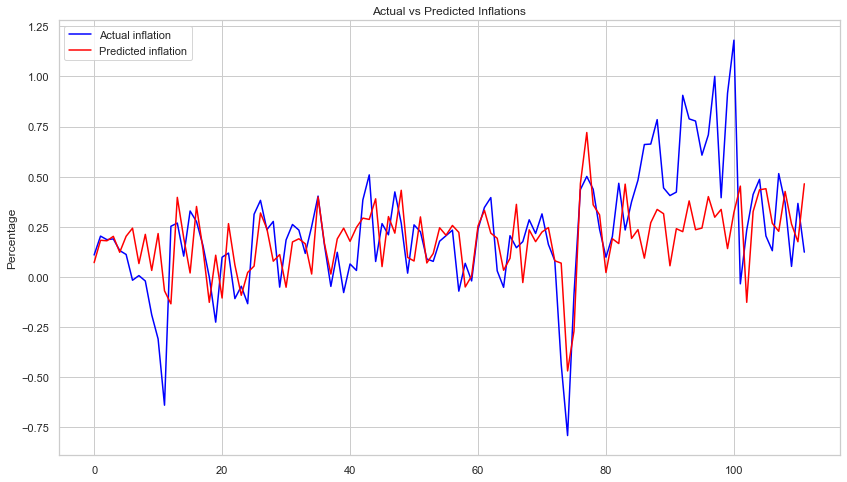

In [31]:
from sklearn.metrics import mean_squared_error
import math
mse_regression = mean_squared_error(y_test, y_pred)
rmse_regression =  math.sqrt(mse_regression)
print("Mean Squared Error:", mse_regression)
print("Root Mean Squared Error:", rmse_regression)

plt.plot(result['Actual inflation'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted inflation'], linestyle='-', color='red', label='Predicted inflation')


from sklearn.metrics import r2_score


r_squared = r2_score(result['Actual inflation'], result['Predicted inflation'])
print("R-squared:", r_squared)

plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [33]:
# pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])

In [34]:
split_index = int(len(X) * 0.7)

X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]

X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]


# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': [0.95, 0.99],  # Vary the number of PCA components
    'xgb__learning_rate': [0.1, 0.01, 0.001],
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [50, 100, 200, 300]
}

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Access the detailed results
results = grid_search.cv_results_

# Print the best parameters and best score
print("Best parameters: ", best_params)
print("Best score: ", best_score)



Best parameters:  {'pca__n_components': 0.95, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}
Best score:  -0.06703730703300567


In [35]:
start=time.time()    

n_train = 261

n_records = len(X)

y_test_list = []
    
y_pred_list = []

j = 0


pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb', XGBRegressor())
])

# Best parameters
best_params = {'pca__n_components': 0.95, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100}

# Set the best parameters in the pipeline
pipeline_final.set_params(**best_params)

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1

    
end=time.time()

print("Running Time:", end - start)

Running Time: 23.829487800598145


In [36]:
pd.options.display.max_rows=300
result2 = pd.DataFrame({'Actual inflation': y_test_list, 'XG Predicted inflation': y_pred_list}, columns=['Actual inflation', 'XG Predicted inflation'])
result2



Actual inflation  XG Predicted inflation
0            0.110017                0.199114
1            0.203997                0.175656
2            0.186245                0.203025
3            0.190120                0.198797
4            0.132026                0.198813
5            0.112485                0.202071
6           -0.016001                0.186608
7            0.007159                0.190845
8           -0.019793                0.181940
9           -0.188443                0.157514
10          -0.308938                0.133948
11          -0.639069                0.136733
12           0.253144                0.112393
13           0.269033                0.256259
14           0.104194                0.173742
15           0.329232                0.158548
16           0.276410                0.295098
17           0.158506                0.154183
18          -0.000420                0.165376
19          -0.225012                0.149136
20           0.098899                0.127565
21           0.119390                0.225453
22          -0.107613                0.197086
23          -0.045855                0.175338
24          -0.133056                0.138552
25           0.312989                0.182073
26           0.382333                0.261094
27           0.236131                0.247853
28           0.277211                0.157214
29          -0.050383                0.186607
30           0.184751                0.134862
31           0.261978                0.248336
32           0.233995                0.245817
33           0.117825                0.179711
34           0.252134                0.096162
35           0.403493                0.362054
36           0.159139                0.241456
37          -0.046731                0.124129
38           0.123339                0.123353
39          -0.077428                0.231283
40           0.065142                0.127934
41           0.032760                0.240779
42           0.384124                0.205257
43           0.509340                0.234275
44           0.077475                0.151377
45           0.266445                0.116992
46           0.210467                0.232727
47           0.424432                0.177898
48           0.268867                0.236104
49           0.019234                0.129328
50           0.260102                0.136247
51           0.225540                0.239750
52           0.090074                0.162404
53           0.078052                0.143222
54           0.178573                0.194270
55           0.206016                0.190248
56           0.233685                0.282026
57          -0.070444                0.210964
58           0.068466                0.153121
59          -0.019387                0.158612
60           0.238716                0.177264
61           0.346782                0.216324
62           0.396143                0.215977
63           0.030950                0.215912
64          -0.051327                0.135441
65           0.205934                0.146970
66           0.146167                0.232224
67           0.176366                0.105690
68           0.285350                0.208701
69           0.217068                0.205873
70           0.314861                0.176739
71           0.162657                0.219393
72           0.081422                0.241955
73          -0.434504                0.073891
74          -0.790333               -0.579774
75          -0.087507               -0.037252
76           0.435992                0.158588
77           0.501492                0.225792
78           0.437715                0.169913
79           0.237949                0.161729
80           0.098786                0.115497
81           0.202265                0.175379
82           0.467441                0.216031
83           0.234426                0.253469
84           0.375460                0.225553
85           0.482829                0.312424
86 

Mean Squared Error: 0.030534378623569197
Root Mean Squared Error: 0.1747408899587306
R-squared: 0.15041779500650976


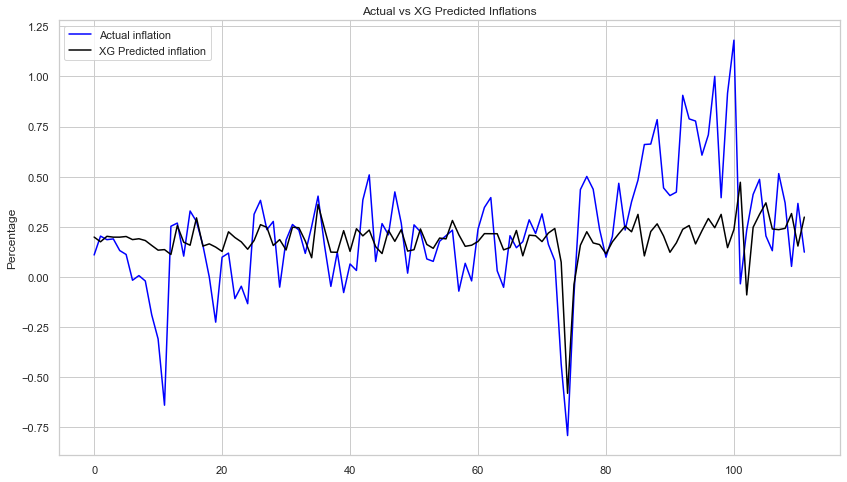

In [37]:
mse_regression = mean_squared_error(y_test, y_pred)
rmse_regression =  math.sqrt(mse_regression)
print("Mean Squared Error:", mse_regression)
print("Root Mean Squared Error:", rmse_regression)

plt.plot(result2['Actual inflation'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result2['XG Predicted inflation'], linestyle='-', color='black', label='XG Predicted inflation')

r_squared_xg = r2_score(result2['Actual inflation'], result2['XG Predicted inflation'])
print("R-squared:", r_squared_xg)

plt.ylabel('Percentage')
plt.title('Actual vs XG Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
print(result.corr())
print(result2.corr())

                     Actual inflation  Predicted inflation
Actual inflation              1.00000              0.48256
Predicted inflation           0.48256              1.00000
                        Actual inflation  XG Predicted inflation
Actual inflation                1.000000                0.413043
XG Predicted inflation          0.413043                1.000000


In [42]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import ParameterGrid

p_values = range(0, 5)
q_values = range(0, 5) 
d_values = range(0, 2) 

Y = pd.Series(y)

Y_train = Y[:261]
Y_test = Y[261:]

param_grid = list(itertools.product(p_values, d_values, q_values))

best_model = None
best_aic = np.inf
best_params = None

for params in param_grid:
    try:
        model = ARIMA(Y, order=params)
        model_fit = model.fit()
        aic = model_fit.aic

        if aic < best_aic:
            best_aic = aic
            best_model = model_fit
            best_params = params
    except:
        continue
        
print(best_model.summary())

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWa

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  373
Model:                 ARIMA(0, 0, 2)   Log Likelihood                   1.597
Date:                Tue, 21 Nov 2023   AIC                              4.806
Time:                        12:00:12   BIC                             20.492
Sample:                    05-01-1992   HQIC                            11.035
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2081      0.022      9.446      0.000       0.165       0.251
ma.L1          0.5514      0.033     16.827      0.000       0.487       0.616
ma.L2          0.1096      0.048      2.293      0.0

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
#Predict variables using rolling window
n_train = 261  # Number of training samples
n_records = len(Y)
forecasts = []
j = 0

for i in range(n_train, n_records):
    train_data = Y[j:i]
    test_data = Y[i:i+1]

    #Fit the ARIMA model with the best parameters
    model = ARIMA(train_data, order=best_params)
    model_fit = model.fit()

    #Forecast using the ARIMA model
    forecast = model_fit.forecast(steps=1)
    forecasts.extend(forecast)

forecasts
    

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/kevinng/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

[0.21078633052277196,
 0.15012862008616684,
 0.21982506599023138,
 0.1872477150737916,
 0.1990374561219363,
 0.1662126325076059,
 0.1673003443775091,
 0.10177950011546959,
 0.1358147133500895,
 0.11059086209634052,
 0.02995140845018532,
 -0.007762007538507726,
 -0.1798717572454675,
 0.3520162597195572,
 0.1868202796646337,
 0.14215985689173655,
 0.28016250181546587,
 0.20527410566006216,
 0.1675239908172778,
 0.10101555870842185,
 0.006898669347255748,
 0.20889752936156405,
 0.1507996482181811,
 0.04766865910942075,
 0.11734479065464308,
 0.04830425802515023,
 0.30096946508478545,
 0.25130316201048447,
 0.1864105753917486,
 0.23318846267347063,
 0.04881991067826105,
 0.23277247333897383,
 0.2129599010277667,
 0.20034393715709495,
 0.14654642777228832,
 0.23438833150137126,
 0.2831131074852478,
 0.13839246439480868,
 0.08248298935222072,
 0.19288622554897042,
 0.05135208110268205,
 0.17089613038764528,
 0.11596096530525093,
 0.31058289079556856,
 0.31033177035592663,
 0.0846186379014487

Mean Squared Error: 0.05934227378885548
Root Mean Squared Error: 0.24360269659602596
R-squared: 0.30850947684100216
                           Actual inflation  ARIMA Predicted inflation
Actual inflation                   1.000000                   0.567986
ARIMA Predicted inflation          0.567986                   1.000000


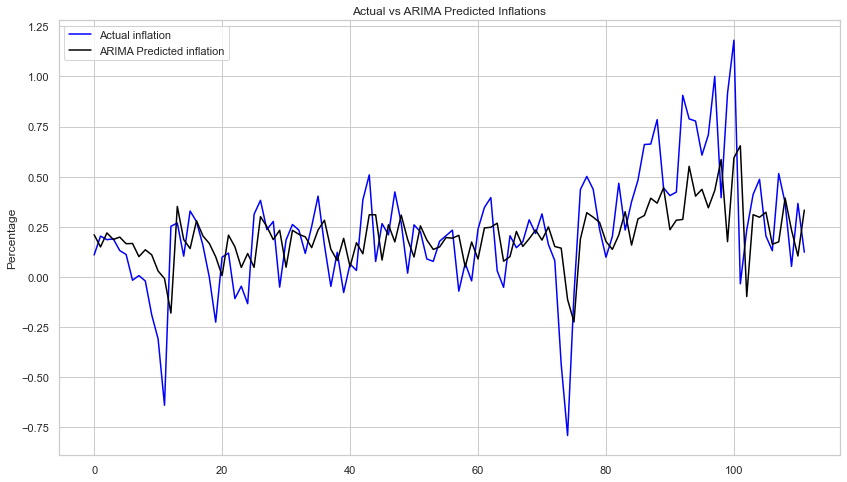

In [72]:
pd.options.display.max_rows=300
result3 = pd.DataFrame({'Actual inflation': y_test_list, 'ARIMA Predicted inflation': forecasts}, columns=['Actual inflation', 'ARIMA Predicted inflation'])
result3

mse_regression = mean_squared_error(y_test_list, forecasts)
rmse_regression =  math.sqrt(mse_regression)
print("Mean Squared Error:", mse_regression)
print("Root Mean Squared Error:", rmse_regression)

plt.plot(result3['Actual inflation'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result3['ARIMA Predicted inflation'], linestyle='-', color='black', label='ARIMA Predicted inflation')

r_squared_arima = r2_score(result3['Actual inflation'], result3['ARIMA Predicted inflation'])
print("R-squared:", r_squared_arima)
print(result3.corr())

plt.ylabel('Percentage')
plt.title('Actual vs ARIMA Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()